In [3]:
import csi_image_preprocess as preprocess
import preprocess as p
# import warnings

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import ensemble
#import lime.lime_tabular
import copy
import tempfile


plt.rcParams.update({'font.size': 15})

In [5]:
data_per_class = [('file', 'exp1csi.txt'), ('file', 'exp2csi.txt'), ('file', 'exp3csi.txt')]

In [6]:
csi_images = []
labels = []

label = 0
type = data_per_class[0][0]
path = data_per_class[0][1]

csi_amp_mat1 = preprocess.get_csi_single_file(path)
#csi_amp_mat1 = csi_amp_mat1[3000:6000,:]

images1 = preprocess.get_csi_images(csi_amp_mat1[1320:5280], 200)
csi_images.append(images1)
labels = labels + [0] * len(images1)

label = 1
type = data_per_class[1][0]
path = data_per_class[1][1]

csi_amp_mat2 = preprocess.get_csi_single_file(path)
#csi_amp_mat2 = csi_amp_mat2[9000:10000,:]

images2 = preprocess.get_csi_images(csi_amp_mat1[5280:7260], 200)
csi_images.append(images2)
labels = labels + [1] * len(images2)

label = 2
type = data_per_class[2][0]
path = data_per_class[2][1]

csi_amp_mat3 = preprocess.get_csi_single_file(path)
#csi_amp_mat3 = csi_amp_mat3[9600:11500,:]

images3 = preprocess.get_csi_images(csi_amp_mat1[7590:9570], 200)
csi_images.append(images3)
labels = labels + [2] * len(images3)

label = 3
images4 = preprocess.get_csi_images(csi_amp_mat1[9570:11550], 200)
csi_images.append(images4)
labels = labels + [3] * len(images4)

label = 4
images5 = preprocess.get_csi_images(csi_amp_mat1[11500:14200], 200)
csi_images.append(images5)
labels = labels + [4] * len(images5)

label = 5
images6 = preprocess.get_csi_images(csi_amp_mat1[14200:16200], 200)
csi_images.append(images6)
labels = labels + [5] * len(images6)

label = 6
images7 = preprocess.get_csi_images(csi_amp_mat1[16200:18200], 200)
csi_images.append(images7)
labels = labels + [6] * len(images7)

label = 7
images8 = preprocess.get_csi_images(csi_amp_mat1[18200:20800], 200)
csi_images.append(images8)
labels = labels + [7] * len(images8)

label = 8
images9 = preprocess.get_csi_images(csi_amp_mat1[20800:23400], 200)
csi_images.append(images9)
labels = labels + [8] * len(images9)

labels = np.array(labels)
csi_images = np.concatenate(csi_images)
len(csi_images)

/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arcta

101

In [7]:
csi_images.shape

(101, 200, 48)

In [8]:
csi_images_flattened = preprocess.flatten_csi_images(csi_images)
len(csi_images_flattened)

9600

Text(0.5, 0.98, 'Flattened Images')

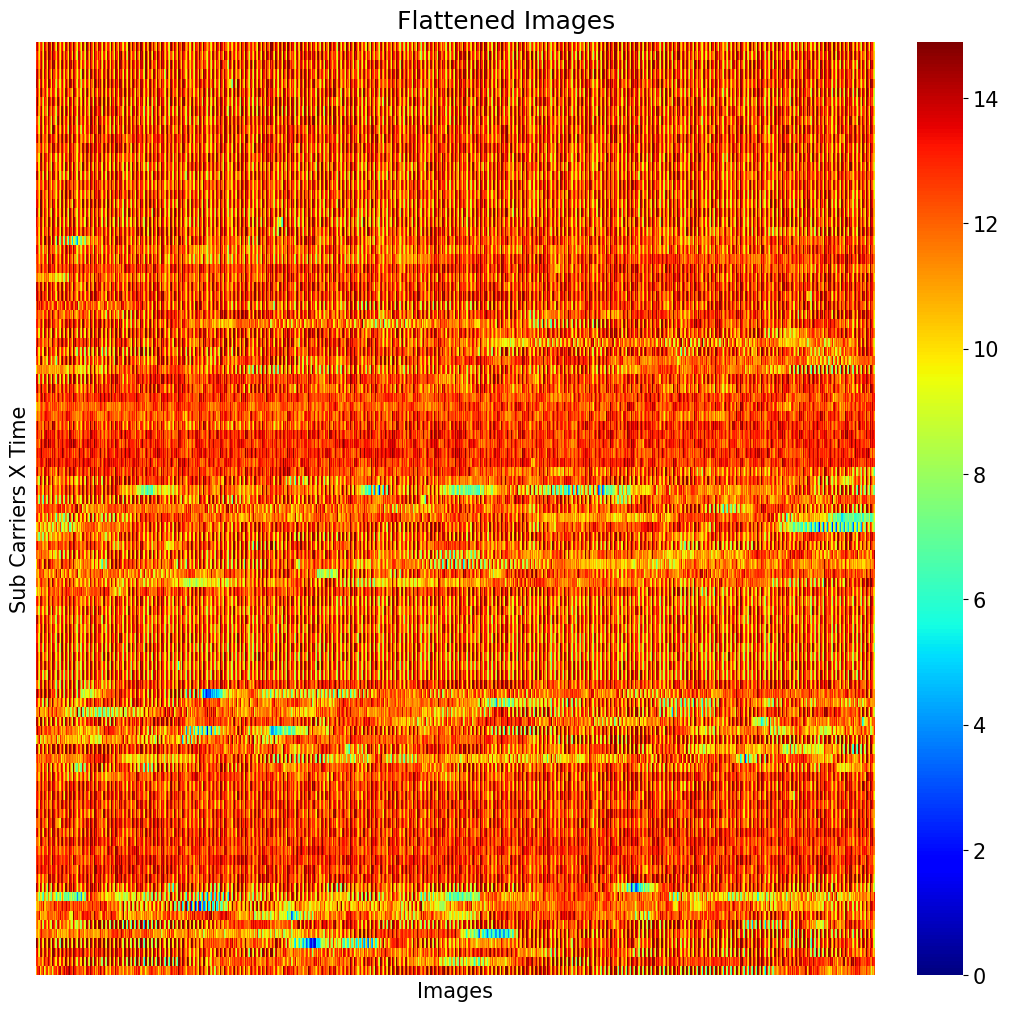

In [9]:
fig, axes = plt.subplots(figsize= (10, 10), constrained_layout=True)
amp = sns.heatmap(csi_images_flattened.transpose(), cmap='jet', yticklabels=False, xticklabels=False, cbar=True)
amp.tick_params(left=False, bottom=False)
amp.set(xlabel = 'Images', ylabel = 'Sub Carriers X Time')
fig.suptitle('Flattened Images')

In [10]:
eigen_signals, eigen_signal_weights, eigen_signal_combination = np.linalg.svd(csi_images_flattened, full_matrices=False)
print(len(eigen_signal_weights))
eigen_signal_weights = np.diag(eigen_signal_weights)

101


In [11]:
csi_images_flattened.shape

(9600, 101)

In [12]:
eigen_modes = [0, 1, 2]

low_dim_ortho_space = eigen_signals[:, eigen_modes].T

In [13]:
low_dim_ortho_space.shape

(3, 9600)

In [14]:
class_exp1_low_dim_representation = preprocess.get_low_dim_class_images(low_dim_ortho_space, csi_images_flattened, labels, 0) #Vacant
class_exp2_low_dim_representation = preprocess.get_low_dim_class_images(low_dim_ortho_space, csi_images_flattened, labels, 1) #1P sitting
class_exp3_low_dim_representation = preprocess.get_low_dim_class_images(low_dim_ortho_space, csi_images_flattened, labels, 2) #1P moving
class_exp4_low_dim_representation = preprocess.get_low_dim_class_images(low_dim_ortho_space, csi_images_flattened, labels, 3) #2P sitting
class_exp5_low_dim_representation = preprocess.get_low_dim_class_images(low_dim_ortho_space, csi_images_flattened, labels, 4) #2P moving
class_exp6_low_dim_representation = preprocess.get_low_dim_class_images(low_dim_ortho_space, csi_images_flattened, labels, 5) #3P sitting
class_exp7_low_dim_representation = preprocess.get_low_dim_class_images(low_dim_ortho_space, csi_images_flattened, labels, 6) #3P moving
class_exp8_low_dim_representation = preprocess.get_low_dim_class_images(low_dim_ortho_space, csi_images_flattened, labels, 7) #4P sitting
class_exp9_low_dim_representation = preprocess.get_low_dim_class_images(low_dim_ortho_space, csi_images_flattened, labels, 8) #4P moving

In [15]:
np.concatenate((class_exp1_low_dim_representation,class_exp2_low_dim_representation), axis = 1).shape

(3, 28)

In [16]:
flattend_low_rank_matrix = np.concatenate([class_exp1_low_dim_representation, class_exp2_low_dim_representation,
                                           class_exp3_low_dim_representation, class_exp4_low_dim_representation,
                                           class_exp5_low_dim_representation, class_exp6_low_dim_representation,
                                          class_exp7_low_dim_representation, class_exp8_low_dim_representation,
                                          class_exp9_low_dim_representation],axis=1)

In [17]:
(flattend_low_rank_matrix).shape

(3, 101)

Text(0.5, 0.98, 'Low Rank Flattened Images')

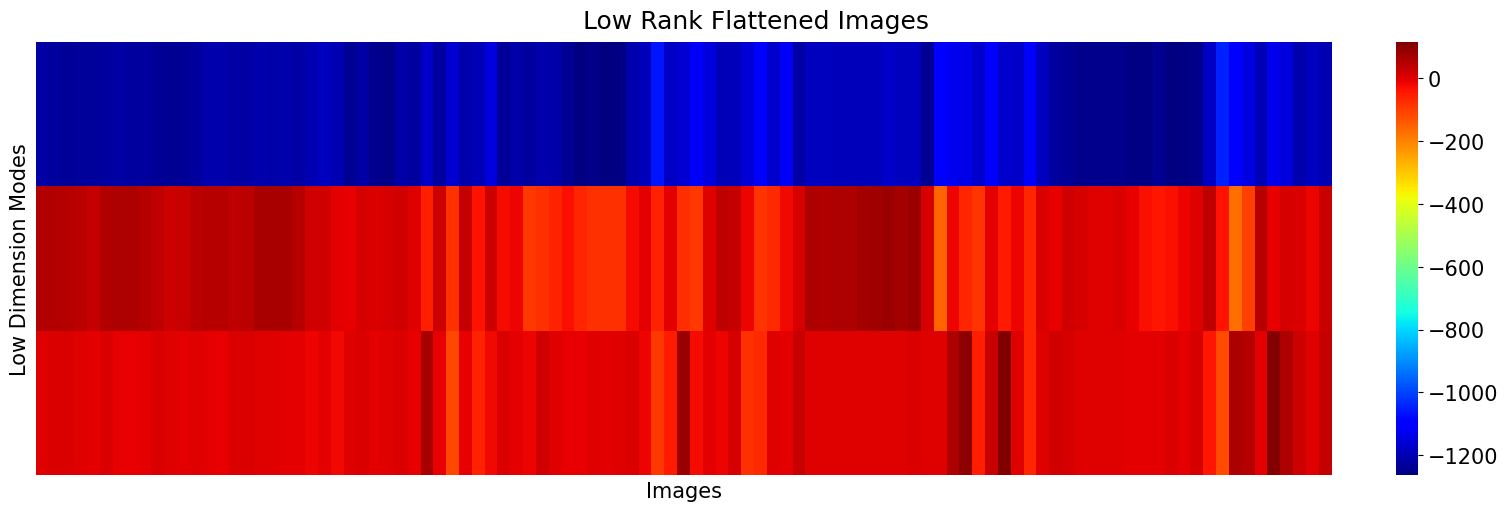

In [18]:
fig, axes = plt.subplots(figsize= (15, 5), constrained_layout=True)
amp = sns.heatmap(flattend_low_rank_matrix, cmap='jet', yticklabels=False, xticklabels=False, cbar=True)
amp.tick_params(left=False, bottom=False)
amp.set(xlabel = 'Images', ylabel = 'Low Dimension Modes')
fig.suptitle('Low Rank Flattened Images')
#fig.savefig('./data/plots/activity_recognition/csi_images_low_rank_flattened.png')

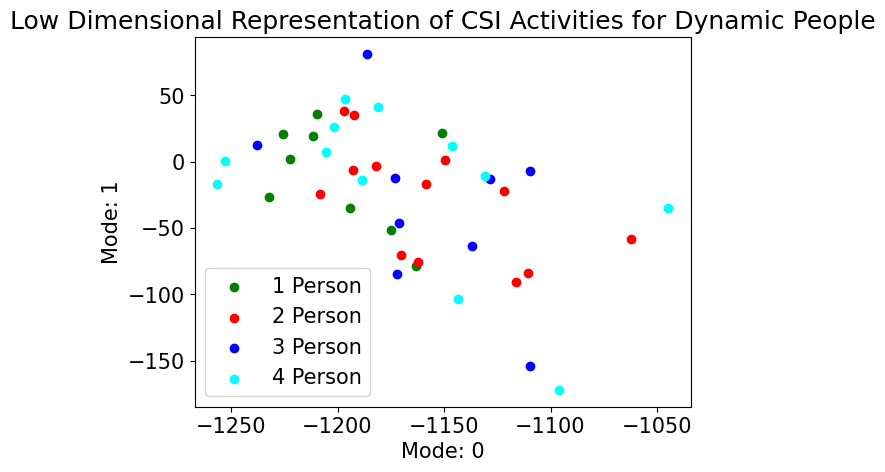

In [19]:
# plt.scatter(class_exp1_low_dim_representation[0, :], class_exp1_low_dim_representation[1, :], color='red', label='vacant')
# plt.scatter(class_exp2_low_dim_representation[0, :], class_exp2_low_dim_representation[1, :], color='green', label='1 Person')
plt.scatter(class_exp3_low_dim_representation[0, :], class_exp3_low_dim_representation[1, :], color='green', label = '1 Person')
# plt.scatter(class_exp4_low_dim_representation[0, :], class_exp4_low_dim_representation[1, :], color='red', label = '2 Person')
plt.scatter(class_exp5_low_dim_representation[0, :], class_exp5_low_dim_representation[1, :], color='red', label = '2 Person')
# plt.scatter(class_exp6_low_dim_representation[0, :], class_exp6_low_dim_representation[1, :], color='blue', label = '3 Person')
plt.scatter(class_exp7_low_dim_representation[0, :], class_exp7_low_dim_representation[1, :], color='blue', label = '3 Person')
# plt.scatter(class_exp8_low_dim_representation[0, :], class_exp8_low_dim_representation[1, :], color='cyan', label = '4 Person')
plt.scatter(class_exp9_low_dim_representation[0, :], class_exp9_low_dim_representation[1, :], color='cyan', label = '4 Person')

plt.title('Low Dimensional Representation of CSI Activities for Dynamic People')
plt.xlabel('Mode: {}'.format(eigen_modes[0]))
plt.ylabel('Mode: {}'.format(eigen_modes[1]))
plt.legend()

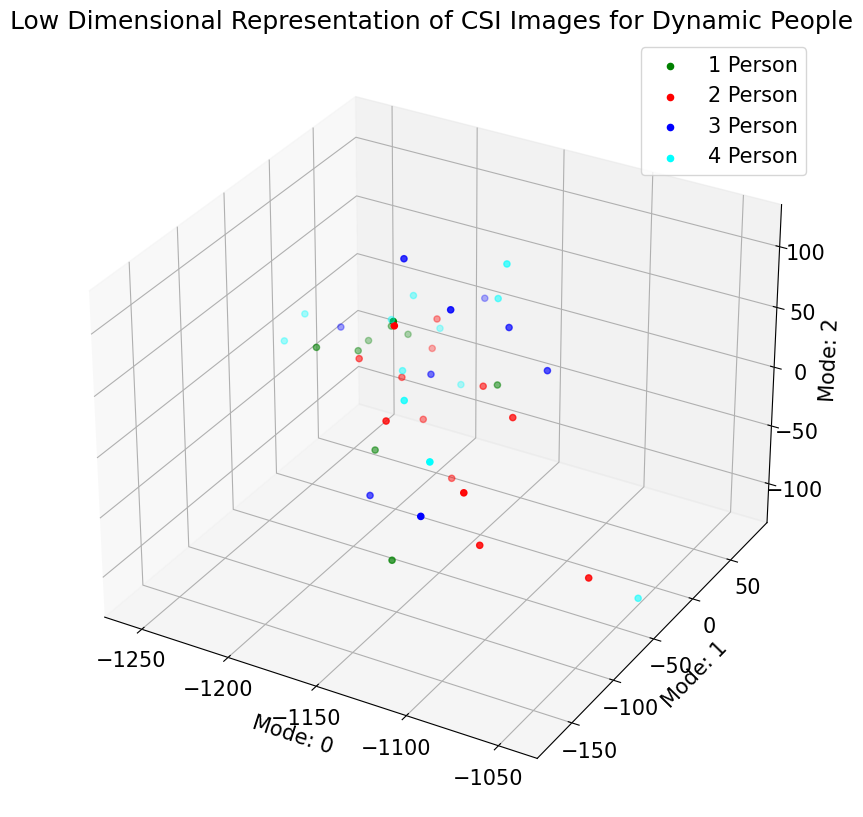

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# ax.scatter(class_exp1_low_dim_representation[0, :], class_exp1_low_dim_representation[1, :], class_exp1_low_dim_representation[2, :], 'd', color='red', label='vacant')
# ax.scatter(class_exp2_low_dim_representation[0, :], class_exp2_low_dim_representation[1, :], class_exp2_low_dim_representation[2, :], 'd', color='green', label='1 Person')
ax.scatter(class_exp3_low_dim_representation[0, :], class_exp3_low_dim_representation[1, :], class_exp3_low_dim_representation[2, :], 'd', color='green', label = '1 Person')
# ax.scatter(class_exp4_low_dim_representation[0, :], class_exp4_low_dim_representation[1, :], class_exp4_low_dim_representation[2, :], 'd', color='red', label = '2 Person')
ax.scatter(class_exp5_low_dim_representation[0, :], class_exp5_low_dim_representation[1, :], class_exp5_low_dim_representation[2, :], 'd', color='red', label = '2 Person')
# ax.scatter(class_exp6_low_dim_representation[0, :], class_exp6_low_dim_representation[1, :], class_exp6_low_dim_representation[2, :], 'd', color='blue', label = '3 Person')
ax.scatter(class_exp7_low_dim_representation[0, :], class_exp7_low_dim_representation[1, :], class_exp7_low_dim_representation[2, :], 'd', color='blue', label = '3 Person')
# ax.scatter(class_exp8_low_dim_representation[0, :], class_exp8_low_dim_representation[1, :], class_exp8_low_dim_representation[2, :], 'd', color='cyan', label = '4 Person')
ax.scatter(class_exp9_low_dim_representation[0, :], class_exp9_low_dim_representation[1, :], class_exp9_low_dim_representation[2, :], 'd', color='cyan', label = '4 Person')


ax.set_xlabel('Mode: {}'.format(eigen_modes[0]))
ax.set_ylabel('Mode: {}'.format(eigen_modes[1]))
ax.set_zlabel('Mode: {}'.format(eigen_modes[2]))

plt.title('Low Dimensional Representation of CSI Images for Dynamic People')
plt.legend()

#plt.savefig('./data/plots/activity_recognition/low_rank_representaion_of_activities_3d.png')
plt.show()

In [21]:
#we have classes as 
# class_exp1_low_dim_representation #Vacant
# class_exp2_low_dim_representation #1P sitting
# class_exp3_low_dim_representation #1P moving
# class_exp4_low_dim_representation #2P sitting
# class_exp5_low_dim_representation #2P moving
# class_exp6_low_dim_representation #3P sitting
# class_exp7_low_dim_representation #3P moving
# class_exp8_low_dim_representation #4P sitting
# class_exp9_low_dim_representation #4P moving

#for individual means of 9 classes
means = []
means.append(np.mean(class_exp1_low_dim_representation,axis = 1))
means.append(np.mean(class_exp2_low_dim_representation,axis = 1))
means.append(np.mean(class_exp3_low_dim_representation,axis = 1))
means.append(np.mean(class_exp4_low_dim_representation,axis = 1))
means.append(np.mean(class_exp5_low_dim_representation,axis = 1))
means.append(np.mean(class_exp6_low_dim_representation,axis = 1))
means.append(np.mean(class_exp7_low_dim_representation,axis = 1))
means.append(np.mean(class_exp8_low_dim_representation,axis = 1))
means.append(np.mean(class_exp9_low_dim_representation,axis = 1))
means = np.array(means)

#for static vs dynamic
meansStaticDynamic = []
static = np.concatenate((class_exp2_low_dim_representation, class_exp4_low_dim_representation, class_exp6_low_dim_representation, class_exp8_low_dim_representation), axis = 1)
dynamic = np.concatenate((class_exp3_low_dim_representation, class_exp5_low_dim_representation, class_exp7_low_dim_representation, class_exp9_low_dim_representation), axis = 1)
meansStaticDynamic.append(np.mean(static, axis = 1))
meansStaticDynamic.append(np.mean(dynamic, axis = 1))
meansStaticDynamic = np.array(meansStaticDynamic)

#for vacant vs everything else
meanVacantOccupied = []
vacant = class_exp1_low_dim_representation
occupied = np.concatenate((class_exp2_low_dim_representation, class_exp3_low_dim_representation, class_exp4_low_dim_representation, 
                           class_exp5_low_dim_representation, class_exp6_low_dim_representation, class_exp7_low_dim_representation, 
                           class_exp8_low_dim_representation, class_exp9_low_dim_representation), axis = 1)
meanVacantOccupied.append(np.mean(vacant, axis = 1))
meanVacantOccupied.append(np.mean(occupied, axis = 1))
meanVacantOccupied = np.array(meanVacantOccupied)

#for one vs many
meanOneMany = []
one = np.concatenate((class_exp2_low_dim_representation, class_exp3_low_dim_representation), axis = 1)
many = np.concatenate((class_exp4_low_dim_representation, class_exp5_low_dim_representation, class_exp6_low_dim_representation, 
                       class_exp7_low_dim_representation, class_exp8_low_dim_representation, class_exp9_low_dim_representation), axis = 1)
meanOneMany.append(np.mean(one, axis = 1))
meanOneMany.append(np.mean(many, axis = 1))
meanOneMany = np.array(meanOneMany)

In [22]:
means

array([[-1.22238108e+03,  4.78580735e+01,  1.84157486e-01],
       [-1.21886884e+03,  1.77873982e+01, -4.35287419e+00],
       [-1.19825886e+03, -1.01470588e+01, -1.43985773e+01],
       [-1.23645306e+03, -6.34215302e+01, -3.34626528e+00],
       [-1.15562622e+03, -2.90228983e+01, -1.91914224e+01],
       [-1.18977765e+03,  6.16850165e+01,  3.68821350e+00],
       [-1.15832545e+03, -3.19620035e+01,  2.86547429e+01],
       [-1.22808780e+03, -1.20167221e+01, -3.43329676e+00],
       [-1.17027583e+03, -1.81208347e+01,  1.51406716e+01]])

In [23]:
meansStaticDynamic

array([[-1.21904999e+03,  6.59731421e-03, -1.98199730e+00],
       [-1.16920255e+03, -2.26448664e+01,  1.40709440e+00]])

In [24]:
meanVacantOccupied

array([[-1.22238108e+03,  4.78580735e+01,  1.84157486e-01],
       [-1.19291048e+03, -1.18716093e+01, -2.04790680e-01]])

In [25]:
meanOneMany

array([[-1208.56384806,     3.82016972,    -9.37572576],
       [-1188.50796458,   -16.2849221 ,     2.37453481]])

In [26]:
#define kmean for Vacant vs Occupied classification
labellingdictVacOcc = {
  0 : "Vacant",
  1 : "Occupied"
}

clusterdictVacOcc = {
  0 : vacant,
  1 : occupied
}

def kmeansVacOcc(X):
  # Step 1 : assignment
  dists = []
  for idx in range(len(meanVacantOccupied)):
    dist_k = np.linalg.norm(X - meanVacantOccupied[idx])
    dists.append(dist_k)

  dists = np.array(dists).T
  assigned = np.argmin(dists)

  with open("outputVacocc.txt", "a") as f:
    f.write(labellingdictVacOcc[assigned] + "\n")

  print(labellingdictVacOcc[assigned])

  #re-evaluating the mean of the cluster
  # meanVacantOccupied[assigned] = np.mean(np.append(clusterdictVacOcc[assigned],X, axis = 1), axis = 1)
# f.close()

In [27]:
#define kmean for Static vs Dynamic classification
labellingdictStatDyn = {
  0 : "Static",
  1 : "Dynamic"
}

clusterdictStatDyn = {
  0 : static,
  1 : dynamic
}

def kmeansStatDyn(X):
  # Step 1 : assignment
  dists = []
  for idx in range(len(meansStaticDynamic)):
    dist_k = np.linalg.norm(X - meansStaticDynamic[idx])
    dists.append(dist_k)
  dists = np.array(dists).T
  assigned = np.argmin(dists)
  with open("outputStatDyn.txt", "a") as f:
    f.write(labellingdictStatDyn[assigned] + "\n")
  print(labellingdictStatDyn[assigned]) 
  #re-evaluating the mean of the cluster
  # meansStaticDynamic[assigned] = np.mean(np.append(clusterdictStatDyn[assigned],X, axis = 1), axis = 1)

In [44]:
#define kmean for Many vs One classification
labellingdictManyOne = {
  0 : "One",
  1 : "Many"
}

clusterdictManyOne = {
  0 : one,
  1 : many
}

def kmeansManyOne(X):
  # Step 1 : assignment
  dists = []
  for idx in range(len(meanOneMany)):
    dist_k = np.linalg.norm(X - meanOneMany[idx])
    dists.append(dist_k)

  dists = np.array(dists).T

  assigned = np.argmin(dists)
  print(X, dists , dists.shape)

  with open("outputManyOne.txt", "a") as f:
    f.write(labellingdictManyOne[assigned] + "\n")
  # print(labellingdictManyOne[assigned])
  #re-evaluating the mean of the cluster
  # meanOneMany[assigned] = np.mean(np.append(clusterdictManyOne[assigned],X, axis = 1), axis = 1)

In [45]:
#define kmean
labellingdict = {
  0 : "Vacant",
  1 : "1 Person Sitting",
  2 : "1 Person Moving",
  3 : "2 Person Sitting",
  4 : "2 Person Moving",
  5 : "3 Person Sitting",
  6 : "3 Person Moving",
  7 : "4 Person Sitting",
  8 : "4 Person Moving"
}

clusterdict = {
  0 : class_exp1_low_dim_representation,
  1 : class_exp2_low_dim_representation,
  2 : class_exp3_low_dim_representation,
  3 : class_exp4_low_dim_representation,
  4 : class_exp5_low_dim_representation,
  5 : class_exp6_low_dim_representation,
  6 : class_exp7_low_dim_representation,
  7 : class_exp8_low_dim_representation,
  8 : class_exp9_low_dim_representation
}

def kmeans(X):
  # Step 1 : assignment
  dists = []
  for idx in range(len(means)):
    dist_k = np.linalg.norm(X - means[idx])
    dists.append(dist_k)

  dists = np.array(dists).T

  assigned = np.argmin(dists)
  with open("regressed.txt", "a") as f:
    f.write(labellingdict[assigned] + "\n")
  #print(labellingdict[assigned])
  #re-evaluating the mean of the cluster
  # means[assigned] = np.mean(np.append(clusterdict[assigned],X, axis = 1), axis = 1)

In [48]:
def my_function(filename):
  # define your function here
  # for example, let's just print the contents of the file
  csi_amp_mat = preprocess.get_csi_single_file(filename)
  # print(csi_amp_mat.shape)
  return csi_amp_mat

with open('exp1csi.txt') as input_file:
  while True:
      # Read the next 200 lines from the input file
      lines = [next(input_file) for _ in range(201)]
      if not lines:
        # End of file reached
        break
      # Write the lines to a temporary file
      with tempfile.NamedTemporaryFile(mode='w', delete=False) as temp_file:
          temp_file.writelines(lines)
          temp_file.flush()
          # Call the function with the temporary file as an argument
          image = my_function(temp_file.name)
          image = np.array(image)
          # print(image.shape)
          csi_image_flattened = np.reshape(image, (1 , (image.shape[0] * image.shape[1])))
          # print(csi_image_flattened.shape)
          csi_image_flattened = csi_image_flattened.transpose()
          # print(csi_image_flattened.shape)
          low_dim_img = low_dim_ortho_space @ csi_image_flattened
          # print(low_dim_img.shape)
          # kmeansStatDyn(low_dim_img)
          #kmeansManyOne(low_dim_img)
          print(low_dim_img.flatten())
      

/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arcta

[-1092.12163418    -7.91694514    94.82406662]
[-1095.65074811    41.45185616   -13.47727203]
[-1159.88081207   -40.56404677    39.75705253]
[-1209.09007652   -14.63823151    28.82359683]
[-1217.59873122    27.11539129    12.72650926]
[-1204.28418136    33.70049009   -18.29295483]
[-1235.08130553    45.25286664    11.0549804 ]
[-1221.01481295    56.05385261    -3.24358517]
[-1228.59072731    54.12937767    -9.35642711]
[-1231.60329923    55.25088596    -6.34434704]
[-1234.3166955     46.57214291    -4.96699671]
[-1232.10135921    39.7283623      6.62561913]
[-1221.58220219    64.86218306     7.72093707]
[-1222.15813248    64.86105469     8.11011272]
[-1.23247637e+03  5.60608389e+01  9.53341962e-01]
[-1228.08289504    40.83434089    -3.20758583]
[-1239.44716871    35.34896447    -8.76310517]
[-1.23963947e+03  2.89025510e+01 -3.01607903e-01]
[-1229.60979578    35.68326334     4.23837019]
[-1217.54475947    57.03646627     1.49579718]
[-1212.14746799    56.67373219     8.10417691]
[-1213.

/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arcta

[-1234.25501094   -22.09675515    10.83005209]
[-1236.21059468     3.39863269   -11.60430909]
[-1218.83168063   -39.9811235    -14.46143957]
[-1200.12681357   -96.49004382    -8.1244211 ]
[-1205.59763112   -65.32822234    -5.63507339]
[-1211.66668326   -36.7190642     17.57252113]
[-1262.13086944   -52.61369071    -9.92911124]
[-1259.76772578   -70.48449834    -8.61250941]
[-1253.01168614   -81.85368008    -2.10951125]
[-1.25388478e+03 -8.49458356e+01 -4.09087523e-01]
[-1.25268725e+03 -7.26194055e+01  1.22032038e+00]
[-1226.24676549   -38.21060891    -4.69108965]
[-1.19128432e+03 -5.22831772e-01 -1.99358971e+01]
[-1063.06623743   -43.78996655   -60.27707378]
[-1175.05073653    18.73879361   -23.85719807]
[-1159.25927989  -104.49168254    26.53933937]
[-1144.33955766   -55.4488623    -49.62365959]
[-1152.88499698   -43.91464786    51.2123835 ]
[-1146.20739533    48.36548707    12.13324834]
[-1197.13967348    23.11694707    10.29758498]
[-1162.64867395    16.85826389   -39.41211476]


/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arcta

[-1116.27985048   -84.95127503   -71.03463938]
[-1149.61171165   -78.13219766    25.04424622]
[-1127.91652717   -35.70138306    -6.59080917]
[-1158.27050207   -57.69691947     3.33072026]
[-1218.84508322    38.39907079    -1.53942236]
[-1177.22958574    64.2336015     -3.99642921]
[-1190.88077709    56.16753662     1.48132873]
[-1.19417986e+03  6.05686517e+01 -1.11352920e+00]
[-1193.28319944    65.21860066    10.41217184]
[-1188.46207346    76.02822361     7.13339297]
[-1190.406765      79.84739845     4.79638602]
[-1174.63763421    80.04089881     1.56596418]
[-1.18347515e+03  7.68864673e+01  1.12344997e+00]
[-1.17887650e+03  8.25155963e+01  5.92816584e-02]
[-1209.1633573     54.23874715   -19.69878678]
[-1159.44898261   -17.80539374   -48.2994378 ]
[-1158.64763465  -111.68866049    57.86330316]
[-1092.73491257   -52.79055168   -85.39125835]
[-1188.54745955    -3.50611532     2.29853392]
[-1101.82949622   -70.10414408    41.03425683]
[-1123.4904806    -75.10328665   -93.35442737]
[-12

/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arcta

[-1142.55551784   -50.54059046    64.18537129]
[-1189.22153821    -6.99959878   -14.68026925]
[-1240.49935696     7.79336559    -4.36348486]
[-1242.39960039    21.66386907    -9.75795751]
[-1242.03835688     9.45824171    -6.1745113 ]
[-1242.72288577     2.64010195    -1.9282999 ]
[-1.25235397e+03  1.58496635e+00  7.29776899e-01]
[-1246.82637328     7.303159      -1.9505653 ]
[-1256.22199939   -18.86882444    -4.99655772]
[-1245.24438271   -38.29237811    -3.5771654 ]
[-1256.88060904   -43.28203426    10.38436597]
[-1256.90869307   -25.68903592    -1.72556075]
[-1260.83681736   -23.0103884      3.30413527]
[-1.25047539e+03 -1.58570967e+01  7.95142748e-01]
[-1223.17357425    50.38437442    11.59614812]
[-1083.73896857    30.19733896    10.48119194]
[-1062.92342537  -170.92414936   -24.98072403]
[-1111.56140931  -110.57183563   -22.7959015 ]
[-1195.25404011    -3.31252107    39.05983762]
[-1134.20630759   -38.2103055    -59.82013706]
[-1137.60763462    52.76786874   -58.46547334]
[-1216.

/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: invalid value encountered in divide
  return np.arctan(even_list/odd_list)  # imaginary comes before real in csi data
/home/yamini/Downloads/p/preprocess.py:63: RuntimeWarning: divide by zero encountered in divide
  return np.arcta

[-1172.91953892    20.20813795   -12.47460041]
[-1.19914419e+03  1.57126264e+01 -1.11016528e+00]
[-1227.67172468    29.71750524    17.72299431]


StopIteration: 